[참고](https://github.com/yunjey/StarGAN)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# # 해당 폴더에 깃허브에서 받는 파일들 저장되어 있어 진행하지 않아도 됨
# !git clone https://github.com/yunjey/StarGAN.git '/content/drive/MyDrive/StarGAN'

Cloning into '/content/drive/MyDrive/StarGAN'...
remote: Enumerating objects: 162, done.
remote: Total 162 (delta 0), reused 0 (delta 0), pack-reused 162
Receiving objects: 100% (162/162), 13.76 MiB | 12.52 MiB/s, done.
Resolving deltas: 100% (79/79), done.


In [ ]:
# # celeba 이미지 다운로드
%cd /content/drive/MyDrive/StarGAN/
# !bash download.sh celeba

# 1

## celeba test 데이터를 표정대로 label 분류한 데이터를 custom dataset으로 이용

- 256X256 얼굴 크롭 사전 진행

'FileWriter' 관련 오류를 미리 방지하기 위해 'logger.py' 파일의 9번째 줄에서 'FileWriter' -> 'create_file_writer'로 수정한다. 

'Summary' 관련 오류를 방지하기 위해서는 'logger.py' 파일의 scalar_summary() 함수를 수정한다.

In [ ]:
# Train StarGAN on custom datasets
!python "/content/drive/MyDrive/StarGAN/main.py" --mode train --dataset RaFD --rafd_crop_size 256 --image_size 128 --c_dim 6 \
                --rafd_image_dir "/content/drive/MyDrive/StarGAN/data/custom/celeba_emotion/train" \
                --sample_dir "/content/drive/MyDrive/StarGAN/stargan_custom/celeba_emotion/samples" --log_dir "/content/drive/MyDrive/StarGAN/stargan_custom/celeba_emotion/logs" \
                --model_save_dir "/content/drive/MyDrive/StarGAN/stargan_custom/celeba_emotion/models" --result_dir "/content/drive/MyDrive/StarGAN/stargan_custom/celeba_emotion/results"

Namespace(c_dim=6, c2_dim=8, celeba_crop_size=178, rafd_crop_size=256, image_size=128, g_conv_dim=64, d_conv_dim=64, g_repeat_num=6, d_repeat_num=6, lambda_cls=1, lambda_rec=10, lambda_gp=10, dataset='RaFD', batch_size=16, num_iters=200000, num_iters_decay=100000, g_lr=0.0001, d_lr=0.0001, n_critic=5, beta1=0.5, beta2=0.999, resume_iters=None, selected_attrs=['Black_Hair', 'Blond_Hair', 'Brown_Hair', 'Male', 'Young'], test_iters=200000, num_workers=1, mode='train', use_tensorboard=True, celeba_image_dir='data/celeba/images', attr_path='data/celeba/list_attr_celeba.txt', rafd_image_dir='/content/drive/MyDrive/SK 쉴더스/모듈프젝3/GAN/StarGAN/data/custom/celeba_emotion/train', log_dir='/content/drive/MyDrive/SK 쉴더스/모듈프젝3/GAN/StarGAN/stargan_custom/celeba_emotion/logs', model_save_dir='/content/drive/MyDrive/SK 쉴더스/모듈프젝3/GAN/StarGAN/stargan_custom/celeba_emotion/models', sample_dir='/content/drive/MyDrive/SK 쉴더스/모듈프젝3/GAN/StarGAN/stargan_custom/celeba_emoti

나는 10000번째만 존재ㅇㅇ => 파일 고쳐보자!
=> main.py에서 model_save_step = 1000으로 고침

256으로 전처리해서 넣는 이유 : 합성 과정에서 내부적인 전처리로 인해 128 보다 클 때 결과가 더 좋음

train 과정에서 총 iteration 수가 200000으로 설정되어 있기 때문에 test할 때에는 가장 마지막 iteration인 200000번째에서 생성된 model을 찾는다. 즉, '200000-D.ckpt', '200000-G.ckpt' 파일을 찾는데, 나는 10000번째와 20000번째 모델밖에 없기 때문에 에러가 발생한다. **이를 해결하기 위해 '20000-D.ckpt'와 '20000-G.ckpt' 파일의 이름을 '200000-D.ckpt'와 '200000-G.ckpt'로 변경하여 다시 컴파일 하였더니 test가 잘 수행되었다**.

테스트 이미지가 단독으로 나올 수 있게 solver.py의 test() 직접 고침
- StarGAN/data 아래 0번 폴더 속에 이미지를 넣어두고 실행
- 변환된 결과가 각 표정별 파일명으로 StarGAN/stargan_custom/results 폴더 안에 저장됨

In [ ]:
# Test StarGAN on custom datasets
!python "/content/drive/MyDrive/StarGAN/main.py" --mode test --dataset RaFD --rafd_crop_size 256 --image_size 128 --c_dim 6 \
                --rafd_image_dir "/content/drive/MyDrive/StarGAN/data" \
                --model_save_dir "/content/drive/MyDrive/StarGAN/stargan_custom/models" --result_dir "/content/drive/MyDrive/StarGAN/stargan_custom/results"

Namespace(c_dim=6, c2_dim=8, celeba_crop_size=178, rafd_crop_size=256, image_size=128, g_conv_dim=64, d_conv_dim=64, g_repeat_num=6, d_repeat_num=6, lambda_cls=1, lambda_rec=10, lambda_gp=10, dataset='RaFD', batch_size=16, num_iters=200000, num_iters_decay=100000, g_lr=0.0001, d_lr=0.0001, n_critic=5, beta1=0.5, beta2=0.999, resume_iters=None, selected_attrs=['Black_Hair', 'Blond_Hair', 'Brown_Hair', 'Male', 'Young'], test_iters=200000, num_workers=1, mode='test', use_tensorboard=True, celeba_image_dir='data/celeba/images', attr_path='data/celeba/list_attr_celeba.txt', rafd_image_dir='/content/drive/MyDrive/StarGAN/data', log_dir='stargan/logs', model_save_dir='/content/drive/MyDrive/StarGAN/stargan_custom/models', sample_dir='stargan/samples', result_dir='/content/drive/MyDrive/StarGAN/stargan_custom/results', log_step=10, sample_step=1000, model_save_step=10000, lr_update_step=1000)
Generator(
  (main): Sequential(
    (0): Conv2d(9, 64, kernel_size=(7, 7), stride=(1, 1), padding=(3,

results 폴더 안에 표정별로 이미지가 담김

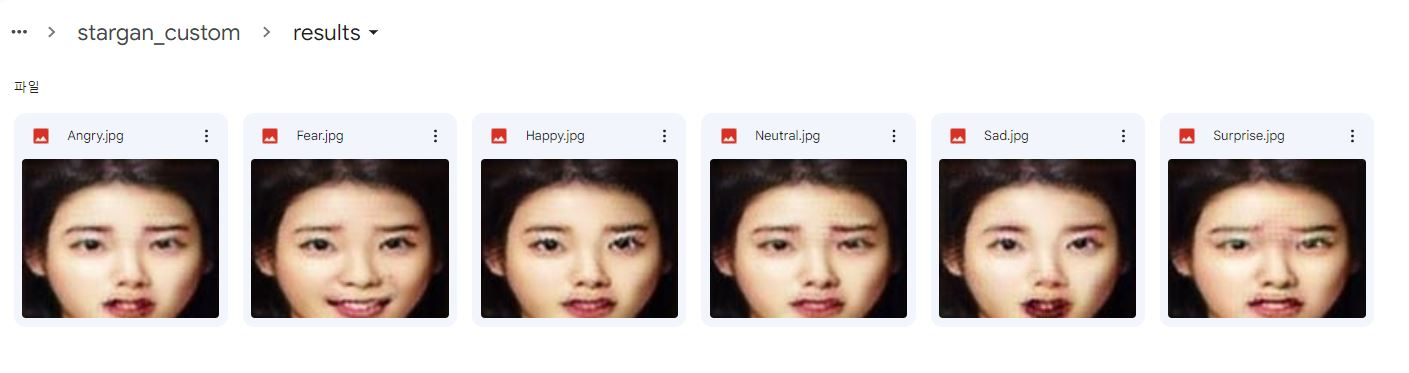